#                                         Airline passenger satisfaction






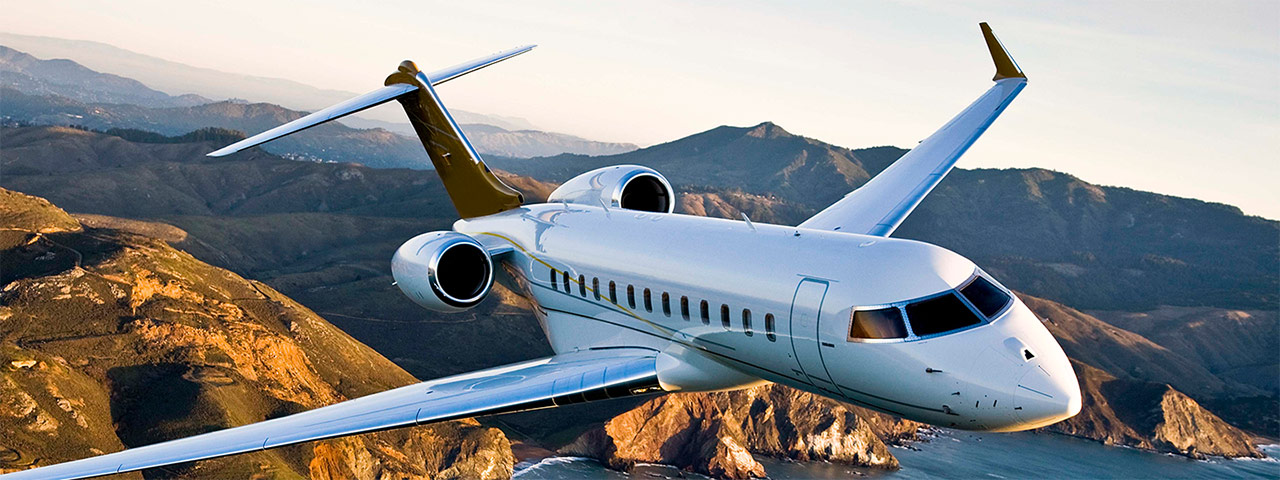

In [1]:
from IPython.display import Image, display
image_path = r"C:\Users\acer\Downloads\samolot-charter-private-jet-charter-02.jpg"
display(Image(filename=image_path, width=1000))  

#                                             Description
Following is the information about the passengers of airline:

1] Gender: male or female

2] Customer type: regular or non-regular airline customer

3] Age: the actual age of the passenger

4] Type of travel: the purpose of the passenger's flight (personal or business travel)

5] Class: business, economy, economy plus

6l Fight distance: The distance of the flight

7] Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)

8] Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)

9] Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)

10] Gate location: level of satisfaction with the gate location (0: not rated; 1-5)

11] Food and drink: food and drink satisfaction level (0: not rated; 1-5)

12] Online boarding: satisfaction level with online boarding (0: not rated; 1-5)

13] Seat comfort: seat satisfaction level (0: not rated; 1-5)

14] Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)

15] On-board service: level of satisfaction with on-board service (0: not rated; 1-5)

16] Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)

17] Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)

18] Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)

19] Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)

20] Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)


This data set contains a survey on air passenger satisfaction. The following classification problem is set:

It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

Satisfaction
Neutral or dissatisfied

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\acer\Downloads\archive (5)\test.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# Target Distribution

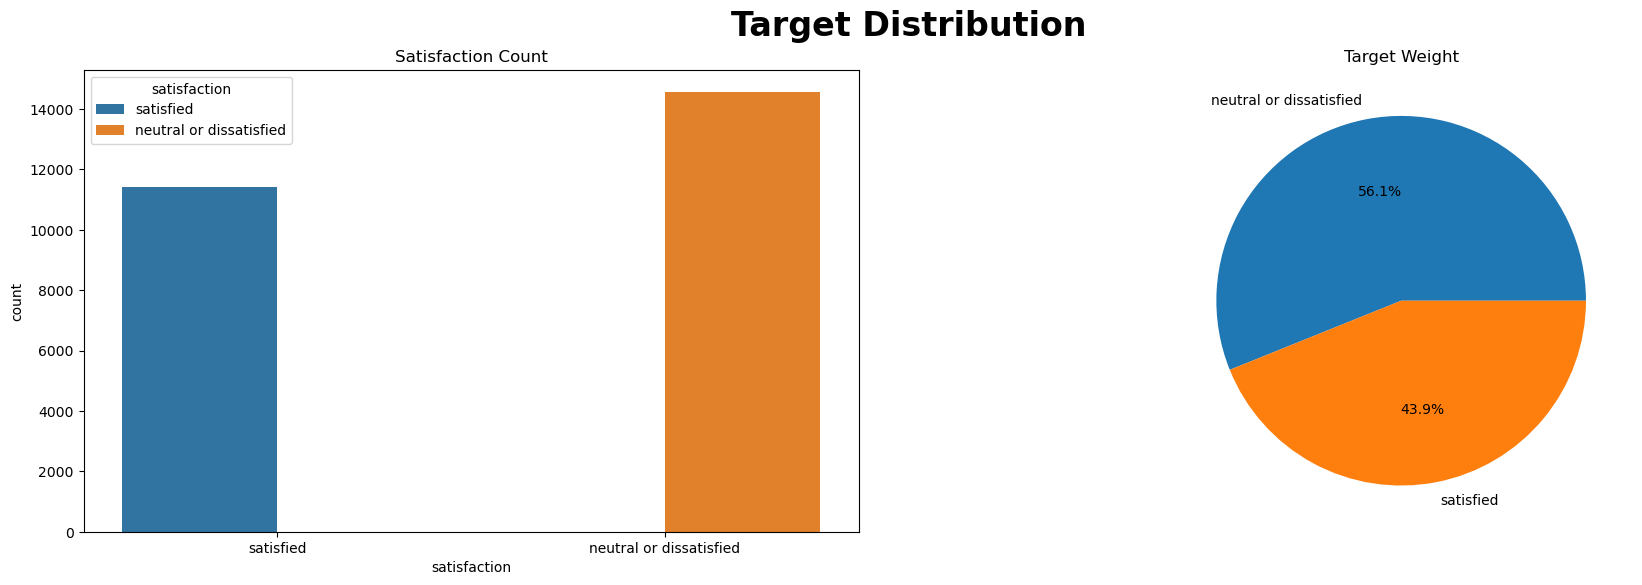

In [4]:
fig = plt.figure(figsize=(22, 6))
plt.suptitle('Target Distribution', weight='bold', fontsize=24)
grid = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

# Creating first subplot by defining axis
ax1 = fig.add_subplot(grid[0, :1])
ax1.set_title('Satisfaction Count')

# With the help of seaborn, we are drawing the countplot
sns.countplot(x='satisfaction', data=df, ax=ax1, hue='satisfaction')


#plotting the second sub plot
ax2=fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')

#This will give the index like this [Index(['neutral or dissatisfied', 'satisfied'], dtype='object', name='satisfaction')]

label=list(df['satisfaction'].value_counts().index)

#This will the count of those index means how may are neutral or dissatisfied and satisfied [array([58879, 45025], dtype=int64)]

value=list(df['satisfaction'].value_counts().values)

#now we will plot the pie chart 

ax2.pie(value,labels=label,autopct='%1.1f%%')
plt.show()

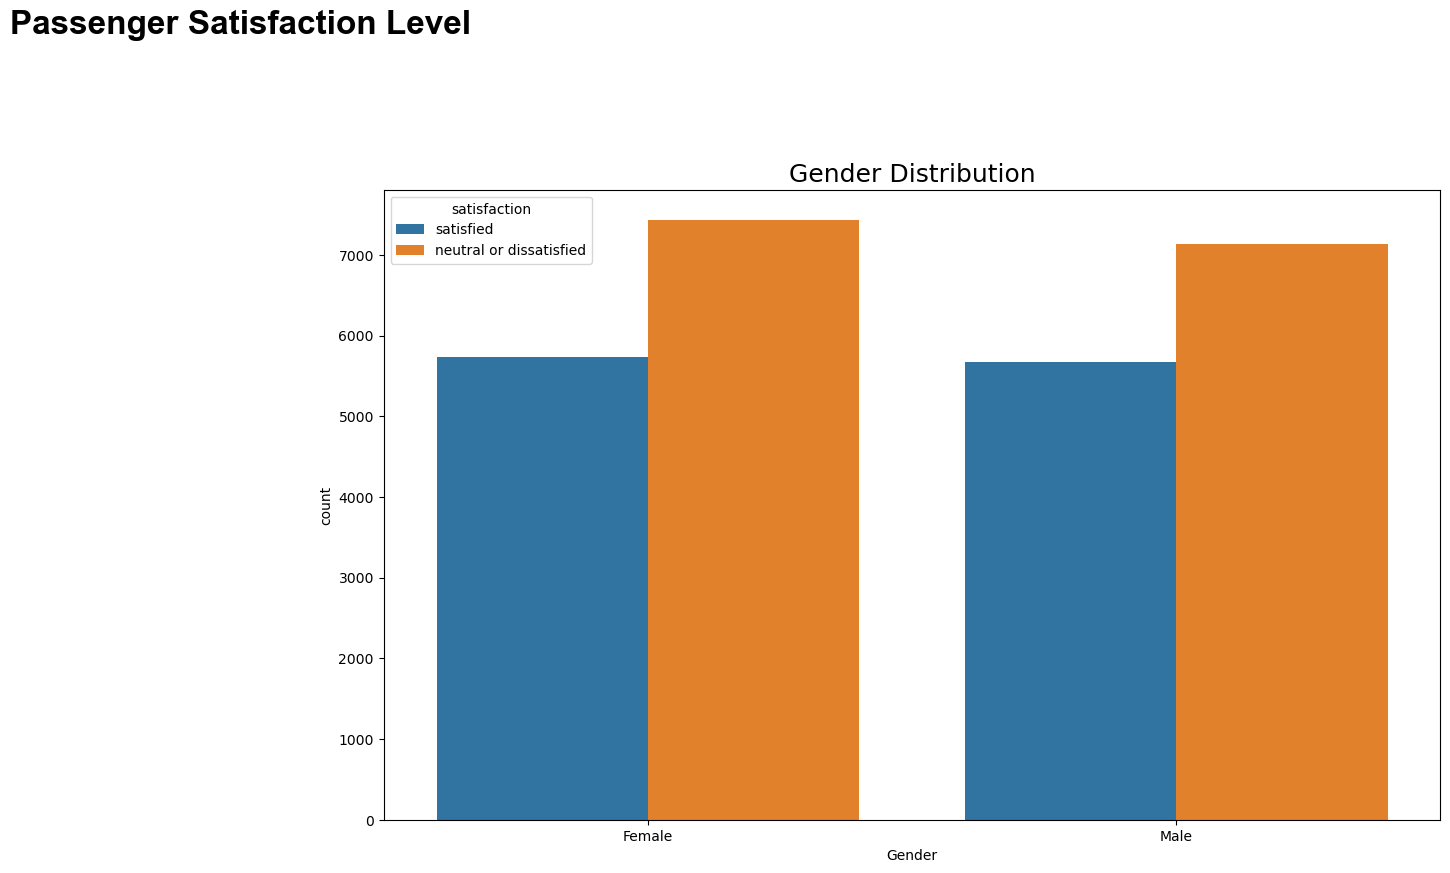

In [5]:
fig = plt.figure(figsize=(30, 18))
plt.suptitle('Passenger Satisfaction Level', weight='bold', fontsize=24, fontname='Arial')
grid = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)

# Create your first subplot by defining axis
ax1 = fig.add_subplot(grid[0, 1])
ax1.set_title('Gender Distribution', fontsize=18) 

# so by using the hue it add the extra factor how many are satisfied and how mayny are not
sns.countplot(x=df['Gender'],hue=df['satisfaction'],  ax=ax1)  

plt.show()

# Visualize the Ordianla Data

In [6]:
# ordinal data  in simple term we can say that basic example is ranking or rating uber driver like that

# first select the numerical columns


num_var=df.select_dtypes(include=['int']).columns[3:]
num_var

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes'],
      dtype='object')

In [7]:
df['Ease of Online booking'].value_counts()

Ease of Online booking
2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: count, dtype: int64

In [8]:
# so this dictionary was created to give some visual specs to the data and in this 
#we have us e the map function to map all the values of that dictionary to the Ease of Online booking to see the rating in more easier way 


ordinal_dict={5: 'Excellent',
              4:'verygood',
              3: 'good',
              2: 'average',
              1: 'bad',
              0: 'not reported'}


df['Ease of Online booking']=df['Ease of Online booking'].map(ordinal_dict)



In [9]:
df['Ease of Online booking'].value_counts()

Ease of Online booking
average         6030
good            5944
verygood        4873
bad             4361
Excellent       3573
not reported    1195
Name: count, dtype: int64

#                         Customer Satisfaction Ratio with respect to Sex

In [10]:
# Sex ratio of Male and Female

df['Gender'].value_counts()

Gender
Female    13172
Male      12804
Name: count, dtype: int64

In [11]:
# Compare target column with sex column

pd.crosstab(df['Gender'],df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,7437,5735
Male,7136,5668


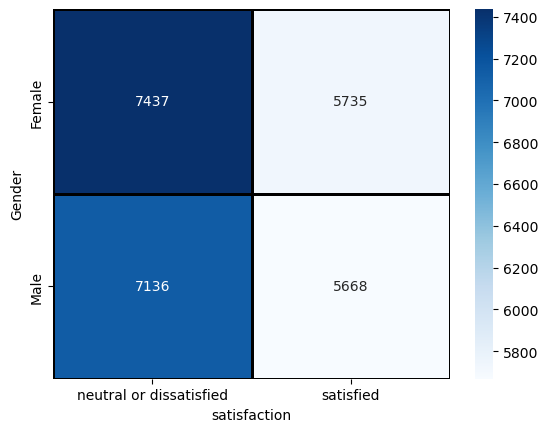

In [12]:

# annot=True: This parameter adds numeric marking means numeric value representation to each cell in the heatmap.

# cmap='Blues': This sets the color map of the heatmap to 'Blues'.

# cbar=True: This includes a color bar alongside the heatmap.

# fmt="d": This specifies the format of the numeraic marking as integers.

# linecolor it provide the border color and linewidth provide the width of that borderline

# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(df['Gender'], df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d",linecolor='black', linewidths=1);

In [13]:
# Check the percentages

pd.crosstab(df['Gender'], df['satisfaction'], normalize=True)*100

satisfaction,neutral or dissatisfied,satisfied
Gender,,
Female,28.630274,22.078072
Male,27.471512,21.820142


Here we can see that around 57% of passengers are not satisfied with the services.

In [14]:
# Customer Type Ratio
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64

In [15]:
# Crosstab Data  
# so basically the crosstab give the combine output like the customer type and its satisfaction 

pd.crosstab(df['Customer Type'], df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,10982,10195
disloyal Customer,3591,1208


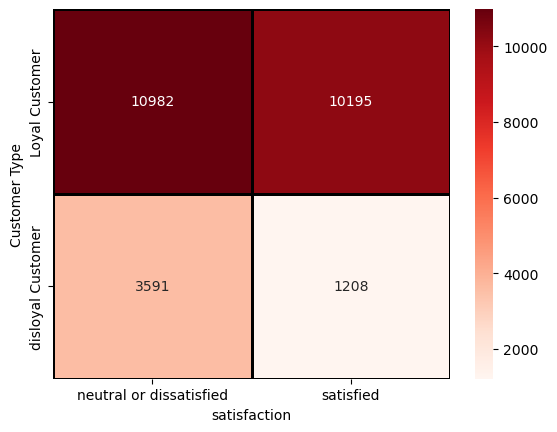

In [16]:
# Visualise this crosstabulated data

sns.heatmap(pd.crosstab(df['Customer Type'],df['satisfaction']),annot=True, cmap='Reds', cbar=True, fmt="d",linecolor='black', linewidths=1);

In [17]:
# Check the percentages

pd.crosstab(df['Type of Travel'], df['satisfaction'], normalize=True)*100


satisfaction,neutral or dissatisfied,satisfied
Type of Travel,,
Business travel,28.595627,40.845396
Personal Travel,27.506160,3.052818


Here we can notice that 69% of travel was done for Business out of which 40% of the customers were satisfied.
Most of the customer (90%) travelling for personal travel are unsatisfied with the services.

#              Customer Satisfaction variation with respect to Class

In [18]:
# Type of Class Ratio

df['Class'].value_counts()

Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64

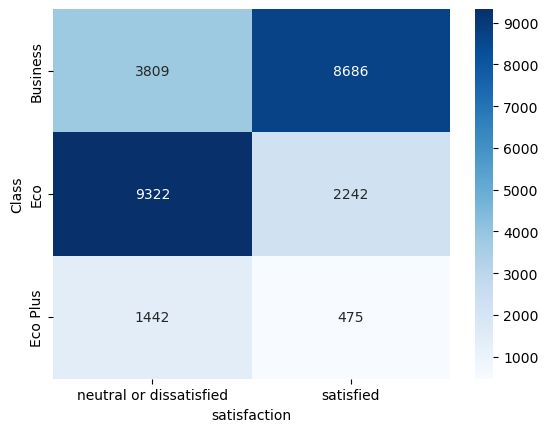

In [19]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(df['Class'],df['satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [20]:
# Check the percentages

pd.crosstab(df['Class'],df['satisfaction'], normalize=True)*100

# normalize:  This parameter normalizes the values, so they represent percentages instead of counts.

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,14.663536,33.438559
Eco,35.886973,8.631044
Eco Plus,5.551278,1.828611


so we can see that in bussiness class the neutral or dissatisfied are 14% and satisfied are 33% and 

in eco and eco_plus the neutral or dissatisfied are more as compare to bussiness class customers

Majorlity of the customers belonging to Eco and Eco Plus are not satisfied with the services.

However majority of the customers from Business Class are satisfied with the services.

In [21]:
# We need to convert the traget column into numerical values 

df["satisfaction"]=df["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

#                                  Checking the count of Null values

In [22]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [23]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [24]:
df['Arrival Delay in Minutes'].mean()

14.74085660217047

In [25]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.438982
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,0.496272
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


# Taking the mean of the column which has null value and replace with mean 

In [26]:
nl_mean=df['Arrival Delay in Minutes'].mean()

#  to replace the value with mean value 4
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(nl_mean)

In [27]:
df.isnull().sum() # checking the null values 

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

So after the replace the null value with mean so no null value are present

#                        Spliting of Numerical and Categorical columns

In [28]:
df_num=df.select_dtypes(['int','float'])
df_num

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,52,160,5,4,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,90035,36,2863,1,1,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,2,12360,20,192,2,0,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,3,77959,44,3377,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,4,36875,49,1182,2,3,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,34,526,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25972,25972,71167,23,646,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25973,25973,37675,17,828,2,5,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25974,25974,90086,14,1127,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [29]:
df_cat=df.select_dtypes(['object'])
df_cat

,Gender,Customer Type,Type of Travel,Class,Ease of Online booking
0,Female,Loyal Customer,Business travel,Eco,good
1,Female,Loyal Customer,Business travel,Business,good
2,Male,disloyal Customer,Business travel,Eco,average
3,Male,Loyal Customer,Business travel,Business,not reported
4,Female,Loyal Customer,Business travel,Eco,verygood
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,good
25972,Male,Loyal Customer,Business travel,Business,verygood
25973,Female,Loyal Customer,Personal Travel,Eco,bad
25974,Male,Loyal Customer,Business travel,Business,good


#                            Label Encoding of Categorical columns

In [30]:
#label Encoding

from sklearn.preprocessing import LabelEncoder


In [31]:
le=LabelEncoder()

In [32]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])   #  convert the cat to label encoder
df_cat

,Gender,Customer Type,Type of Travel,Class,Ease of Online booking
0,0,0,0,1,3
1,0,0,0,0,3
2,1,1,0,1,1
3,1,0,0,0,4
4,0,0,0,1,5
...,...,...,...,...,...
25971,1,1,0,0,3
25972,1,0,0,0,5
25973,0,0,1,1,2
25974,1,0,0,0,3


#                                                  Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()

0 to 1 in meanmax scaler  and -1 to 1 in standard scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns you want to scale (you can specify column names or column indices)
columns_to_scale = ['Age','Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']  # Replace with actual column names

# Fit and transform the selected columns
df_num_scaled = df_num.copy()  # Create a copy of the original DataFrame
df_num_scaled[columns_to_scale] = scaler.fit_transform(df_num_scaled[columns_to_scale])

# Now, df_num_scaled contains the scaled values for the specified columns,
# while the other columns remain unchanged.


In [36]:
df_num_scaled[columns_to_scale] = scaler.fit_transform(df_num_scaled[columns_to_scale])

df_num_scaled   # Feature scaling on the numeric column

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,0.576923,0.026050,1.0,0.8,0.75,0.6,0.8,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1
1,1,90035,0.371795,0.571890,0.2,0.2,0.00,1.0,0.8,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1
2,2,12360,0.166667,0.032512,0.4,0.0,0.75,0.4,0.4,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0
3,3,77959,0.474359,0.675687,0.0,0.0,0.25,0.6,0.8,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1
4,4,36875,0.538462,0.232431,0.4,0.6,0.50,0.8,0.2,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,0.346154,0.099960,0.6,0.6,0.00,0.8,0.6,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000,0
25972,25972,71167,0.205128,0.124192,0.8,0.8,0.75,0.8,0.8,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000,1
25973,25973,37675,0.128205,0.160945,0.4,1.0,1.00,0.4,0.2,0.25,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000,0
25974,25974,90086,0.089744,0.221325,0.6,0.6,0.50,0.8,0.8,0.75,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000,1


In [37]:
df_scaled=pd.DataFrame(data=df_num_scaled,columns=df_num.columns)
print(df_scaled)  

       Unnamed: 0     id       Age  Flight Distance  Inflight wifi service  \
0               0  19556  0.576923         0.026050                    1.0   
1               1  90035  0.371795         0.571890                    0.2   
2               2  12360  0.166667         0.032512                    0.4   
3               3  77959  0.474359         0.675687                    0.0   
4               4  36875  0.538462         0.232431                    0.4   
...           ...    ...       ...              ...                    ...   
25971       25971  78463  0.346154         0.099960                    0.6   
25972       25972  71167  0.205128         0.124192                    0.8   
25973       25973  37675  0.128205         0.160945                    0.4   
25974       25974  90086  0.089744         0.221325                    0.6   
25975       25975  34799  0.448718         0.047052                    0.4   

       Departure/Arrival time convenient  Gate location  Food a

# Concatenation of Categorical and Numerical columns

In [38]:
df_new=pd.concat([df_cat,df_scaled],axis=1)

In [39]:
df_new

,Gender,Customer Type,Type of Travel,Class,Ease of Online booking,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,3,0,19556,0.576923,0.026050,1.0,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1
1,0,0,0,0,3,1,90035,0.371795,0.571890,0.2,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1
2,1,1,0,1,1,2,12360,0.166667,0.032512,0.4,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0
3,1,0,0,0,4,3,77959,0.474359,0.675687,0.0,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1
4,0,0,0,1,5,4,36875,0.538462,0.232431,0.4,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,0,0,3,25971,78463,0.346154,0.099960,0.6,...,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000,0
25972,1,0,0,0,5,25972,71167,0.205128,0.124192,0.8,...,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000,1
25973,0,0,1,1,2,25973,37675,0.128205,0.160945,0.4,...,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000,0
25974,1,0,0,0,3,25974,90086,0.089744,0.221325,0.6,...,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000,1


#                                         Splitting the X and Y 

In [40]:
y=df_new.iloc[:,24:25]
y

,satisfaction
0,1
1,1
2,0
3,1
4,1
...,...
25971,0
25972,1
25973,0
25974,1


In [41]:
#drop the un wanted column which are going to be my x
df_new.columns = df_new.columns.str.strip()  #s.strip() removes the leading and trailing spaces from the string 
columns_to_drop = ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Gate location', 'Online boarding', 'satisfaction']
x = df_new.drop(columns_to_drop, axis=1)
x  

,Gender,Customer Type,Type of Travel,Class,Ease of Online booking,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,3,1.0,0.8,0.6,0.50,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462
1,0,0,0,0,3,0.2,0.2,1.0,1.00,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000
2,1,1,0,1,1,0.4,0.0,0.4,0.25,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000
3,1,0,0,0,4,0.0,0.0,0.6,0.75,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381
4,0,0,0,1,5,0.4,0.6,0.8,0.25,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,0,0,3,0.6,0.6,0.8,0.75,0.8,0.6,0.4,0.75,0.75,1.0,0.8,0.000000,0.000000
25972,1,0,0,0,5,0.8,0.8,0.8,0.75,0.8,0.8,1.0,1.00,1.00,1.0,0.8,0.000000,0.000000
25973,0,0,1,1,2,0.4,1.0,0.4,0.25,0.4,0.8,0.6,0.75,1.00,0.8,0.4,0.000000,0.000000
25974,1,0,0,0,3,0.6,0.6,0.8,0.75,0.8,0.6,0.4,1.00,0.75,1.0,0.8,0.000000,0.000000


#                  Importing the models and Traning them all at once  

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier(random_state=42) #It select 

In [45]:
def mymodel(model):
    model.fit(x_train,y_train
             )
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

#                                        Logistic Regression 

In [46]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4411
           1       0.84      0.82      0.83      3382

    accuracy                           0.85      7793
   macro avg       0.85      0.85      0.85      7793
weighted avg       0.85      0.85      0.85      7793



LogisticRegression()

#                                         DecisionTree

In [47]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4411
           1       0.92      0.93      0.92      3382

    accuracy                           0.93      7793
   macro avg       0.93      0.93      0.93      7793
weighted avg       0.93      0.93      0.93      7793



DecisionTreeClassifier()

#                                                SVM

In [48]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4411
           1       0.91      0.89      0.90      3382

    accuracy                           0.91      7793
   macro avg       0.91      0.91      0.91      7793
weighted avg       0.91      0.91      0.91      7793



SVC()

#                                                Random Forest 

In [50]:
 mymodel(rf)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4411
           1       0.96      0.93      0.94      3382

    accuracy                           0.95      7793
   macro avg       0.95      0.95      0.95      7793
weighted avg       0.95      0.95      0.95      7793



RandomForestClassifier(random_state=42)

#                                  Gridsearch using random forest

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid=param_grid = {
    'max_depth': [None, 10, 20, 30], # max_depth allows the tree to make more complex decisions by creating deeper splits, potentially leading to overfitting
    'min_samples_split': [2, 5, 10], #  This parameter specifies the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]   # This parameter sets the minimum number of samples required to be at a leaf node.
}

In [53]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) 

CV: This parameter determines the cross-validation splitting strategy. In this case, cv=5 indicates 5-fold cross-validation

Scoring: This parameter specifies the evaluation metric used to assess the performance of the model for each combination of hyperparameters



n_jobs: This parameter specifies the number of jobs to run in parallel for training the models. 
Setting n_jobs=-1 means that the grid search will utilize all available CPU cores for parallel processing, 
which can speed up the hyperparameter tuning process, especially for large datasets or complex models.


In [54]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [55]:
print("Best Parameters: ", gs.best_params_)
print("Best Score: ", gs.best_score_)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.9541878741077296


In [56]:
best_rf_model = gs.best_estimator_


In [57]:
y_pred = best_rf_model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9517515719235211


In [59]:
y_pred=rf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [60]:
rf.predict([[1,1,0,1,1,2,0,2,2,2,4,1,3,2,2,2,0,0.0]])

array([1], dtype=int64)

  #                               Gridsearch using logisticregression

In [61]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    # C is the Regularization Parameter #Techinque to convert overfit to good fit is Regularization 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [62]:
    grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


    #estimator:This is the machine learning model for which you want to perform hyperparameter tuning. In your case, 
    #It's referred to as logreg, which suggests it's a logistic regression model. 

    #

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [64]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score:  0.8590987899999789


In [65]:
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(x_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8524316694469396


In [67]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}

classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid]

In [68]:
from sklearn.model_selection import StratifiedKFold

cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.9471486648389963
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.9567177470908168
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8593185486772976


# Model Comparison and Conclusions

In [1]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.9471486648389963, 0.9567177470908168, 0.8593185486772976],
    "ML Models": ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression"]
})

# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)

# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.grid()
# Show the plot
plt.show()


NameError: name 'pd' is not defined

# Conclusion:
In this project, we build various models like logistic regression, knn classifier,decision tree classifier & random forest classifier

A Random Forest Classifier gives the highest accuracy score of 95.00 percent among all the ML Models. 

So for the Airline passenger Satisfaction prediction Random Forest is best model